# Simple Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is perhaps the most simple of all of the models. Do you remember the linear formula where `m` is the slope and `b` is where the line starts on the y-axis?

$$y=mx+b$$

This is a simple linear model since there is only one coefficient - `mx`.

## Imports and load data

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

In [117]:
df = pd.read_csv("./SalaryData.txt")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [118]:
df.shape

(33, 2)

Before continuing, check if there are any missing data in the data set.

In [119]:
df.isnull().values.any()

False

## Splitting data into Test and Train

Splitting the depedent variable (`Salary`) out from the indepedent variable (`YearsExperience`) so we can build our model.

We use the `train_test_split` method from `scikit-learn` to split our data. The `test_size` is used to tell it what percentage of the data to use for our testing data set and the `random_state` is used as a seed for the random splitting of the data. The seed will randomize the split in the same way each time for reproducability.

In [120]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.shape

(26, 2)

In [121]:
train_set.head()

,YearsExperience,Salary
21,6.0,93940.0
12,4.0,56957.0
0,1.1,39343.0
4,2.2,39891.0
16,4.9,67938.0


In [122]:
test_set.head()

,YearsExperience,Salary
31,10.5,121872.0
15,4.5,61111.0
26,8.7,109431.0
17,5.1,66029.0
8,3.2,64445.0


## Exploratory Data Analysis

Explore the data to find trends. Using the `describe` method to get descriptive statistics on numerical columns of our data. The `corr` method to calculate correlations between the columns of our data. And plotting with `matplotlib` via the `plot` method to get a visual of the data. Also using `seaborn`'s `regplot` to give us what a linear regression line of our data may look like and to verify that our data looks linear.

In [123]:
train_set.describe()

,YearsExperience,Salary
count,26.000000,26.000000
mean,5.319231,76046.269231
std,2.929303,28339.605860
min,1.100000,37731.000000
25%,3.050000,56006.000000
50%,4.550000,65578.000000
75%,7.700000,100544.750000
max,10.400000,122391.000000


Text(0.5, 1.0, 'Fig 1. Salary vs Experience')

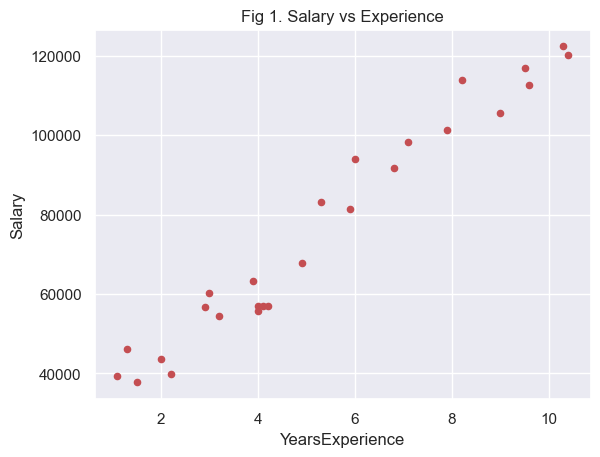

In [124]:
train_set.plot.scatter(x='YearsExperience', y='Salary',c=['r'])

plt.title('Fig 1. Salary vs Experience')


Text(0.5, 1.0, 'Fig 2. Regression Linear of Salary vs Experience')

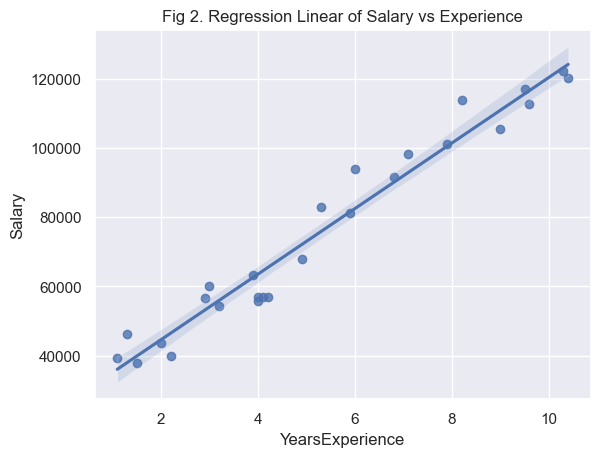

In [125]:
# Regression plot
sns.regplot(x='YearsExperience', # Horizontal axis
            y='Salary', # Vertical axis
            data=train_set)

plt.title('Fig 2. Regression Linear of Salary vs Experience')

## Predict

We're making three other data sets for the `LinearRegression` model:
- `test_` that is just the `YearsExperience` column (dropping the `Salary` column) that will be used for analyzing and scoring our model. `test_set` is the full data set after split.
- `train_labels` that is just the `Salary` column to train the `LinearRegression` model what the answers are when passing in the years of experience input.
- `train_set` that is also just the `YearsExperience` column (dropping the `Salary` column) that will be passed into the `LinearRegression`'s `fit` method as the `x` parameter.

In [126]:
test_ = test_set.drop(["Salary"], axis=1) # X axis
test_.head()

,YearsExperience
31,10.5
15,4.5
26,8.7
17,5.1
8,3.2


In [127]:
test_set.head()

,YearsExperience,Salary
31,10.5,121872.0
15,4.5,61111.0
26,8.7,109431.0
17,5.1,66029.0
8,3.2,64445.0


In [128]:
train_labels = train_set["Salary"]
train_labels.head()

21    93940.0
12    56957.0
0     39343.0
4     39891.0
16    67938.0
Name: Salary, dtype: float64

In [129]:
train_set = train_set.drop(["Salary"], axis=1)
train_set.head()

,YearsExperience
21,6.0
12,4.0
0,1.1
4,2.2
16,4.9


Now that we have our data in the correct form, we pass in the `train_set` and `train_labels` into the `fit` method to train the model.

In [130]:
# Initialize the list of models
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression()

Now we have a model and can call the `predict` function on it with inputs. 

In [131]:
salary_pred = lin_reg.predict(test_)

salary_pred

array([125140.84207167,  68282.98488399, 108083.48491537,  73968.77060276,
        55963.78249333,  60701.93725897,  76811.66346214])

## Analyze Results

We can get the coefficients and intercept from our model.

In [132]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [9476.30953128]
Intercept:  25639.59199323001


With that information we can build our line formula - $y=9476.309x + 25639.591$

We can compare our predictions to our testing set label columns.

In [133]:
#compare predicted and actual salary
print(salary_pred)
print(test_set["Salary"])

[125140.84207167  68282.98488399 108083.48491537  73968.77060276
  55963.78249333  60701.93725897  76811.66346214]
31    121872.0
15     61111.0
26    109431.0
17     66029.0
8      64445.0
9      57189.0
19     82090.0
Name: Salary, dtype: float64


### Simple Model Evaluation

We can also evaluate it using `MAE` (mean absolute error), `MSE` (mean squared error), `RMSE` (root mean square error).

`MAE` represents average error. 
`MSE` is similar to `MAE` but larger errors are exaggerated more due the square function. The squared values make it much larger than the original units.
`RMSE` is the square root of `MSE`. 

Models in `scikit-learn` have a `score` method. Depending on the model, this method will do a different calculation. For `LinearRegression` it calculates the $r^2$.

In [134]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(test_set["Salary"],salary_pred))
print("MSE:", metrics.mean_squared_error(test_set["Salary"],salary_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(test_set["Salary"],salary_pred)))

MAE: 5285.80056379283
MSE: 34158723.56875228
RMSE: 5844.546481015638


In [135]:
lin_reg.score(test_, test_set["Salary"])

0.9392722746799265

There's also a separate `r2_score` method that will calculate the $r^2$. It is a goodness of fit measure. Higher value is generally better. We will discuss this later. 

In [136]:
r2_score(test_set["Salary"], salary_pred)

0.9392722746799265

### Plot Prediction

We can also plot our test data as a scatter plot and, with our predicted salary that we got from our model, plot a line to see how well it fits the data.

Text(0.5, 1.0, 'Fig 3. Regression Linear Prediction of Salary vs Experience')

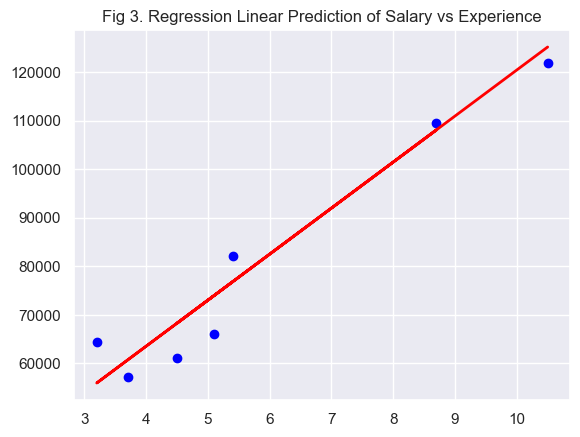

In [137]:
plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue')
plt.plot(test_set["YearsExperience"], salary_pred, color='red', linewidth=2)

plt.title('Fig 3. Regression Linear Prediction of Salary vs Experience')

We can also plot the regression line directly from the equation obtained earlier: $y=9476.309x + 25639.591$

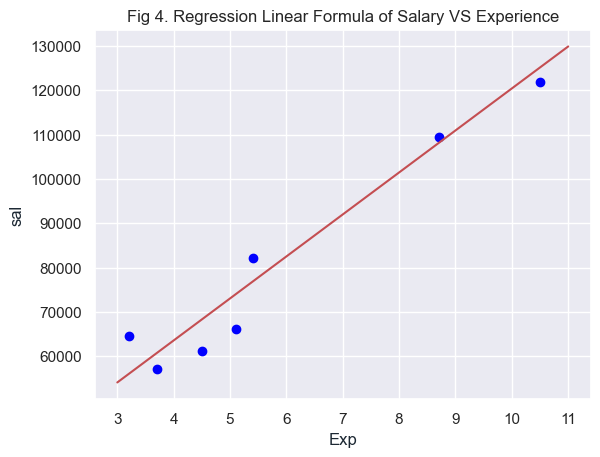

In [138]:
x = np.linspace(3,11,40)
y = 9476.309*x + 25639.591

plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue')
plt.plot(x, y, '-r', label='Reg Line')
plt.title('Fig 4. Regression Linear Formula of Salary VS Experience')
plt.xlabel('Exp', color='#1C2833')
plt.ylabel('sal', color='#1C2833')
plt.show()

### Question
1. What is the predicted salary of somebody with 8 years of experience? Where did you obtain the prediction from?

### Answer



In [139]:
# Predicted salary with 7 years of experience:


y = 9476.309*x+25639.7
x = 8

print("Predicted Salary:", y)


Predicted Salary: [ 54068.627       56012.48525641  57956.34351282  59900.20176923
  61844.06002564  63787.91828205  65731.77653846  67675.63479487
  69619.49305128  71563.35130769  73507.2095641   75451.06782051
  77394.92607692  79338.78433333  81282.64258974  83226.50084615
  85170.35910256  87114.21735897  89058.07561538  91001.93387179
  92945.79212821  94889.65038462  96833.50864103  98777.36689744
 100721.22515385 102665.08341026 104608.94166667 106552.79992308
 108496.65817949 110440.5164359  112384.37469231 114328.23294872
 116272.09120513 118215.94946154 120159.80771795 122103.66597436
 124047.52423077 125991.38248718 127935.24074359 129879.099     ]


Based on the calculation above, the predicted salary of somebody with 8 yars of experience is `101450.172`.

### Question

Re-run the regression 2 more times with different train-test split. Plot the 3 linear regression line together. 

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split

#### 1. Create 2 more train-test split

# Assuming df is your DataFrame and 'target' is the column you want to predict
X = df.drop(columns=['Salary'])  # Features
y = df['Salary']  # Target variable

# Split the data into the first train and test datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=24)

# Split the data into the second train and test datasets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=64)

# Combine X and y for the first train and test datasets
train_set1 = pd.concat([X_train1, y_train1], axis=1)
test_set1 = pd.concat([X_test1, y_test1], axis=1)

# Combine X and y for the second train and test datasets
train_set2 = pd.concat([X_train2, y_train2], axis=1)
test_set2 = pd.concat([X_test2, y_test2], axis=1)

In [141]:
#### 2. Create 2 Linear Regression Models

# Create and train the first linear regression model
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

# Predict and evaluate the first model
y_pred1 = model1.predict(X_test1)
mae1 = metrics.mean_absolute_error(y_test1, y_pred1)
mse1 = metrics.mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)
print(f'Model 1 - MAE: {mae1}, MSE: {mse1}, RMSE: {rmse1}')

Model 1 - MAE: 6252.355546233332, MSE: 53797742.272468306, RMSE: 7334.69442256924


In [142]:
# Create and train the second linear regression model
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Predict and evaluate the second model
y_pred2 = model2.predict(X_test2)
mae2 = metrics.mean_absolute_error(y_test2, y_pred2)
mse2 = metrics.mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)
print(f'Model 2 - MAE: {mae2}, MSE: {mse2}, RMSE: {rmse2}')

Model 2 - MAE: 4233.318382212987, MSE: 32840315.911844674, RMSE: 5730.647076189972


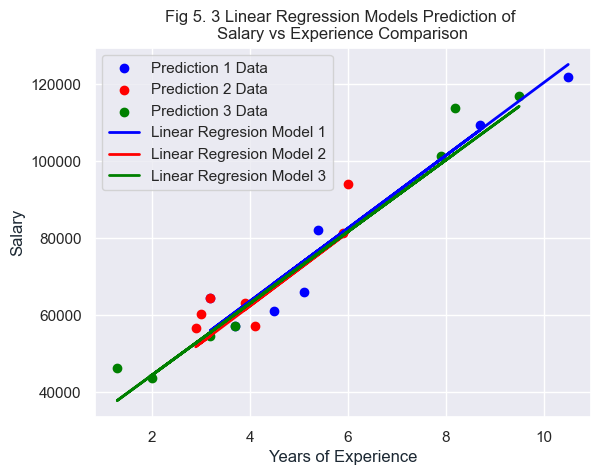

Model 1: y = 9476.30953127997*x + 25639.59199323001 
Model 2: y = 9569.042184727594*x + 23974.886746806544 
Model 3: y = 9324.805963123417*x + 25649.26398828759 


In [143]:
plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue', label='Prediction 1 Data')
plt.scatter(test_set1["YearsExperience"], test_set1["Salary"], color='red', label='Prediction 2 Data')
plt.scatter(test_set2["YearsExperience"], test_set2["Salary"], color='green', label='Prediction 3 Data')

plt.plot(test_set["YearsExperience"], salary_pred, color='blue', linewidth=2, label='Linear Regresion Model 1')
plt.plot(test_set1["YearsExperience"], y_pred1, color='red', linewidth=2, label='Linear Regresion Model 2')
plt.plot(test_set2["YearsExperience"], y_pred2, color='green', linewidth=2, label='Linear Regresion Model 3')

plt.title('Fig 5. 3 Linear Regression Models Prediction of \nSalary vs Experience Comparison')
plt.xlabel('Years of Experience', color='#1C2833')
plt.ylabel('Salary', color='#1C2833')
plt.legend()
plt.show()

# Print the formula for the 3 models with 3 points of decimal

print(f'Model 1: y = {lin_reg.coef_[0]}*x + {lin_reg.intercept_} ')
print(f'Model 2: y = {model1.coef_[0]}*x + {model1.intercept_} ')
print(f'Model 3: y = {model2.coef_[0]}*x + {model2.intercept_} ')


1. What can say about the 3 regression lines?

In [144]:
print("8 Years Salary Model 1:", lin_reg.predict([[8]]))
print("8 Years Salary Model 2:", model1.predict([[8]]))
print("8 Years Salary Model 3:", model2.predict([[8]]))

8 Years Salary Model 1: [101450.06824347]
8 Years Salary Model 2: [100527.22422463]
8 Years Salary Model 3: [100247.71169327]


d:\Users\Ian Joseph\Documents\GitHub\data-science\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Users\Ian Joseph\Documents\GitHub\data-science\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Users\Ian Joseph\Documents\GitHub\data-science\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1. The 3 regression lines shows similarity in angle of the lines. With 3 different random-state splits configuration:
    - Dataset 1: 42
    - Dataset 2: 24
    - Dataset 3: 64

2. What is predicted salary for 8 years of experience for all 3 regression?
   
   **Answer**:
    - Model 1: [101450.06824347]
    - Model 2: [101361.21802055]
    - Model 3: [102858.53716239]

3. Are the predicted values similar?
   
    **Answer**:
    The predicted values of the 3 models are similar.

In [145]:
actual_salary = df['Salary']
actual_salary.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [146]:
salary_pred0 = lin_reg.predict(df.drop(columns=['Salary']))
model1_pred = model1.predict(df.drop(columns=['Salary']))
model2_pred = model2.predict(df.drop(columns=['Salary']))

bias0 = np.mean(actual_salary - salary_pred0)
bias1 = np.mean(actual_salary - model1_pred)
bias2 = np.mean(actual_salary - model2_pred)

variance0 = np.var(salary_pred0)
variance1 = np.var(model1_pred)
variance2 = np.var(model2_pred)

print(f'Model 1 - Bias: {bias0}, Variance: {variance0}')
print(f'Model 2 - Bias: {bias1}, Variance: {variance1}')
print(f'Model 3 - Bias: {bias2}, Variance: {variance2}')

Model 1 - Bias: -205.6504754005161, Variance: 707998561.7890918
Model 2 - Bias: 954.9263459167802, Variance: 721922932.7141087
Model 3 - Bias: 608.3060182475308, Variance: 685541115.0601782


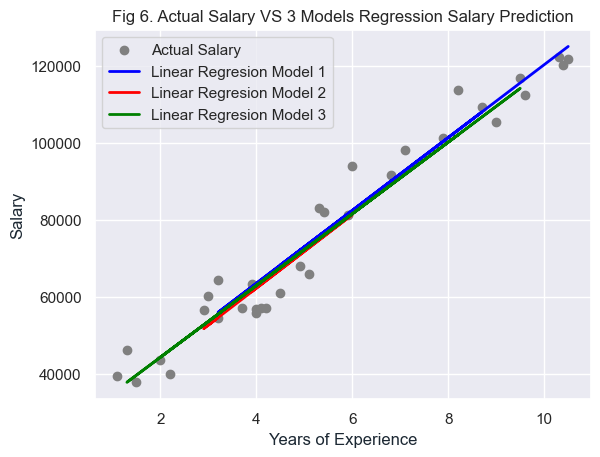

In [147]:
# Scatter plot the 3 models with actual salary
plt.scatter(df['YearsExperience'], actual_salary, color='gray', label='Actual Salary')

plt.plot(test_set["YearsExperience"], salary_pred, color='blue', linewidth=2, label='Linear Regresion Model 1')
plt.plot(test_set1["YearsExperience"], y_pred1, color='red', linewidth=2, label='Linear Regresion Model 2')
plt.plot(test_set2["YearsExperience"], y_pred2, color='green', linewidth=2, label='Linear Regresion Model 3')


plt.title('Fig 6. Actual Salary VS 3 Models Regression Salary Prediction')
plt.xlabel('Years of Experience', color='#1C2833')
plt.ylabel('Salary', color='#1C2833')
plt.legend()
plt.show()


### Bias
**Definition**: Bias measures the difference between the average prediction of the model and the actual values. It indicates how well the model's predictions match the true values.

**Formula**: [ $\text{Bias} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$ ] where:
- ( $y_i$ ) is the actual value.
- ( $\hat{y}_i$ ) is the predicted value.
- ( $n$ ) is the number of data points.

### Variance
**Definition**: Variance measures the variability of the model's predictions. It indicates how much the model's predictions change when trained on different subsets of the data.

**Formula**: [ $\text{Variance} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - \bar{\hat{y}})^2$ ] where:
- ( $\hat{y}_i$ ) is the predicted value.
- ( $\bar{\hat{y}}$ ) is the mean of the predicted values.
- ( n ) is the number of data points.

4. Can you explain your answer in question (1&2) above? That is explain why the answers are similar (or not similar) after doing a separate train-test split. What can you say about the model variance and bias?

    **Answer**:
    
    We checked the Bias & Variance of the 3 models based on actual data shown in Fig 6. The results are:
    - **Model 1**: Bias: -205.65, Variance: 707,998,561.79
    - **Model 2**: Bias: 954.93, Variance: 721,922,932.71
    - **Model 3**: Bias: 608.31, Variance: 685,541,115.06
    
    The Bias & Variance results are similar, indicating that the Linear Regression models are also similar.

5. Redo the regression with SalaryData2.txt. What can you say about model variance and bias?

Text(0.5, 1.0, 'Fig 7. Data 2 Actual Salary VS Years of Experience')

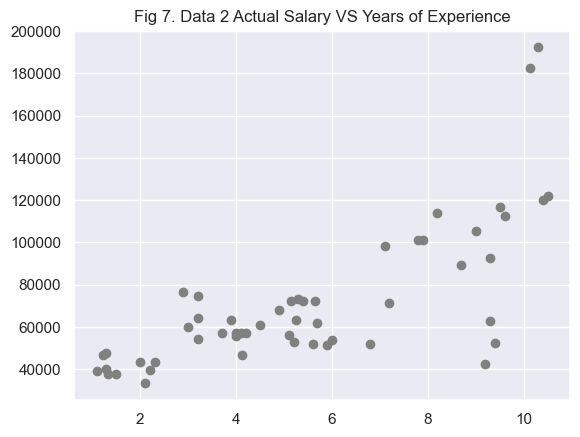

In [148]:
df2 = pd.read_csv("./SalaryData2.txt")

# Scatter plot df2
plt.scatter(df2['YearsExperience'], df2['Salary'], color='gray', label='Actual Salary')
plt.title('Fig 7. Data 2 Actual Salary VS Years of Experience')

Model - MAE: 18105.411862391546, MSE: 813834843.9265106, RMSE: 28527.790729856923, R2: 0.4858522603209229
Model - Bias: 1051.993941475993, Variance: 567230260.6654541


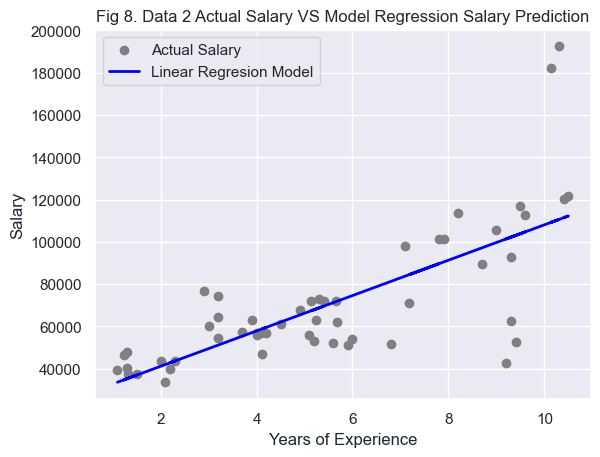

In [149]:
# Split the data into X and y
X2 = df2.drop(columns=['Salary']) # Features
y2 = df2['Salary'] # Target variable

# Train & Test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train2, y_train2)

# Predict and evaluate the model
y_pred2 = model.predict(X_test2)
mae = metrics.mean_absolute_error(y_test2, y_pred2)
mse = metrics.mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_pred2)
print(f'Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')

# Bias and Variance
salary_pred2 = model.predict(X2)
bias = np.mean(y2 - salary_pred2)
variance = np.var(salary_pred2)
print(f'Model - Bias: {bias}, Variance: {variance}')

# Scatter plot the model with actual salary
plt.scatter(df2['YearsExperience'], df2['Salary'], color='gray', label='Actual Salary')
plt.plot(df2['YearsExperience'], model.predict(X2), color='blue', linewidth=2, label='Linear Regresion Model')
plt.title('Fig 8. Data 2 Actual Salary VS Model Regression Salary Prediction')
plt.xlabel('Years of Experience', color='#1C2833')
plt.ylabel('Salary', color='#1C2833')
plt.legend()
plt.show()

## Answer 5
The `SalaryData2.txt` dataset in Fig 8 is more spread out than `SalaryData.txt`. The higher Bias and Variance of `SalaryData2` indicate **lower linear regression model accuracy** compared to `SalaryData`.